In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.shape

(42000, 785)

In [4]:
numbers = np.arange(42000)
random.shuffle(numbers)
print(numbers)

[40232 17434 30732 ... 31908 35977 17596]


In [5]:
number = train_data.iloc[numbers[:100],1:]
number.shape

(100, 784)

In [6]:
figure = np.zeros((28*10,28*10))
for i in range(number.shape[0]):
    row = int(i/10)
    col = i%10
    figure[28*row:28*row+28,28*col:28*col+28] = number.iloc[i,:].values.reshape((28,28))

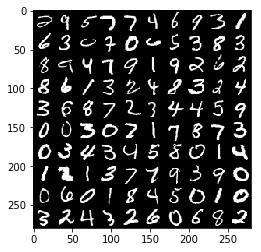

In [7]:
plt.imshow(figure,cmap='gray')

In [8]:
np.random.standard_normal((5,5))

array([[-0.48121165, -1.98928586,  0.96013873,  0.14105183,  0.56605237],
       [ 1.71388942, -0.34332809, -1.27952003,  1.24332486,  1.17216787],
       [-0.01968282,  1.4217625 ,  0.56179168, -0.63987385, -0.43966094],
       [ 0.97454117,  0.60283653, -0.881437  ,  0.35037592, -1.79205811],
       [ 0.11168983, -0.41978306,  0.23354565, -0.03692523,  1.50826666]])

In [9]:
def ith_sample(i,need_data=False,need_show=True):
    data = train_data.iloc[i,:]
    if need_show:
        plt.imshow(data.iloc[1:].values.reshape(28,28),cmap='gray')
    if need_data:
        return data
    else:
        return None

In [10]:
28*28

784

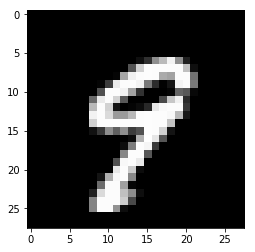

In [11]:
ith_sample(11)

In [12]:
import time
import math
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)
start = time.time()

In [ ]:
epsilon = 0.12 # initialize all weighs between -0.12 ~ 0.12
W1 = np.random.random((784,784)) * epsilon * 2 - epsilon # map from input to hidden
b1 = np.random.random((784,1)) * epsilon * 2 - epsilon # bias1 
W2 = np.random.random((10,784)) * epsilon * 2 - epsilon # map from hidden to output
b2 = np.random.random((10,1)) * epsilon * 2 - epsilon # bias2
epoch = 100 # maximum training turns
alpha = 0.1 # learning rate
epoch_cost = np.zeros((epoch,))
lastac = 0
maxac = 0

W1_best = None
W2_best = None
b1_best = None
b2_best = None

In [16]:
def sigmoid(x): # sigmoid function 
    return 1/(1+np.power(np.e,-x))

def forward(x,W1,W2,b1,b2): # feed forward
    a = W1.dot(x)
    z = sigmoid(a+b1)
    b = W2.dot(z)
    y = sigmoid(b+b2)
    return a,z,b,y.reshape((-1,1))

def pred(X,W1,W2,b1,b2): # predict
    y_pred = np.zeros((2,X.shape[0]))
    for i in range(X.shape[0]):
        x = X[i,:] # initialize x
        _,_,_,y = forward(x.reshape((-1,1)),W1,W2,b1,b2)
        y_pred[:,i] = y.reshape((-1,))
    return y_pred

In [11]:
for turn in range(epoch):
    print('turn:',turn,end=' ')
    print('time:',timeSince(start),end=' ')
    for index in range(40000):
        x_y = ith_sample(index,need_data=True,need_show=False)
        x = x_y[1:].values.reshape((-1,1))/255
        y = np.zeros((10,1))
        y[x_y[0],0] = 1
        
        a,z,b,y_pred = forward(x,W1,W2,b1,b2) # feed forward
        
        cost = -y.T.dot(np.log(y_pred)) - (1-y.T).dot(np.log(1-y_pred)) # calculate cost
        if index % 300 ==0 :
            time.sleep(2)
            
        #print('cost',cost)
        epoch_cost[turn] += cost # calculate cumulative cost of this epoch

        origin_W2 = W2.copy() # use origin W2 to update W1 and b1
        
        
        W2 -= alpha * (y_pred - y).dot(z.T)
        b2 -= alpha * (y_pred - y) 
        W1 -= alpha * origin_W2.T.dot(y_pred-y) * (z * (1-z)).dot(x.T)
        b1 -= alpha * origin_W2.T.dot(y_pred - y) * z * (1-z)
    
    ac = 0
    for index in range(40000,42000):
        if index % 300 == 0:
            time.sleep(2)
        x_y = ith_sample(index,need_data=True,need_show=False)
        x = x_y[1:].values.reshape((-1,1))/255
        y = x_y[0]
        
        a,z,b,y_pred = forward(x,W1,W2,b1,b2) # feed forward
        
        if y == y_pred.argmax():
            ac += 1
    
    
    print('cost:',epoch_cost[turn],end=' ')
    print('ac:{:.4f}%'.format(ac/2000*100))
    
    if ac > maxac:
        W1_best = W1.copy()
        W2_best = W2.copy()
        b1_best = b1.copy()
        b2_best = b2.copy()
        
        maxac = ac
        print('best performance ,record')    


print('prediction\n',pred(X,W1,W2,b1,b2))
print('ground-truth\n',Y)

turn: 0 time: 0m 2s cost: 19080.508693026793 ac:96.0000%
best performance ,record
turn: 1 time: 6m 18s cost: 7998.682542036102 ac:96.7500%
best performance ,record
turn: 2 time: 12m 34s cost: 4982.685581118737 ac:97.0000%
best performance ,record
turn: 3 time: 18m 50s cost: 3171.722597789503 ac:97.4000%
best performance ,record
turn: 4 time: 25m 5s cost: 2049.2790811361897 ac:97.3500%
turn: 5 time: 31m 21s cost: 1317.6002815719057 ac:97.7000%
best performance ,record
turn: 6 time: 37m 36s cost: 883.8274963134583 ac:97.6500%
turn: 7 time: 43m 51s cost: 563.1409107334168 ac:97.5000%
turn: 8 time: 50m 6s cost: 390.0076214045709 ac:97.6000%
turn: 9 time: 56m 21s cost: 279.9897944738969 ac:97.6000%
turn: 10 time: 62m 36s cost: 217.88236812728718 ac:97.6500%
turn: 11 time: 68m 51s cost: 178.00752377880778 ac:97.6500%
turn: 12 time: 75m 7s cost: 149.18847258629768 ac:97.7000%
turn: 13 time: 81m 22s cost: 127.15597173884912 ac:97.7500%
best performance ,record
turn: 14 time: 87m 37s cost: 110.

/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


cost: nan ac:97.9500%
best performance ,record
turn: 23 time: 143m 57s cost: nan ac:97.9500%
turn: 24 time: 150m 13s cost: nan ac:98.0000%
best performance ,record
turn: 25 time: 156m 28s cost: nan ac:98.0000%
turn: 26 time: 162m 43s cost: nan ac:98.0500%
best performance ,record
turn: 27 time: 168m 58s cost: nan ac:98.0500%
turn: 28 time: 175m 14s cost: nan ac:98.0500%
turn: 29 time: 181m 29s cost: nan ac:98.0500%
turn: 30 time: 187m 45s cost: nan ac:98.0500%
turn: 31 time: 194m 0s cost: nan ac:98.0500%
turn: 32 time: 200m 16s cost: nan ac:98.0500%
turn: 33 time: 206m 31s cost: nan ac:98.0500%
turn: 34 time: 212m 47s cost: nan ac:98.0500%
turn: 35 time: 219m 2s cost: nan ac:98.0500%
turn: 36 time: 225m 17s cost: nan ac:98.0500%
turn: 37 time: 231m 33s 

KeyboardInterrupt: 

In [80]:
96.9*2000

193800.0

In [73]:
42000/144

291.6666666666667

In [20]:
def pred_figure(i,cmp=True):
    x_y = ith_sample(i,need_data=True,need_show=True)
    x = x_y[1:].reshape((-1,1))/255
    _,_,_,y = forward(x,W1,W2,b1,b2)
    if cmp:
        print('pred',y.argmax())
        print('true',x_y[0])
    else:
        if y.argmax() == x_y[0]:
            return 1
        else:
            return 0

In [19]:
print(W1.shape)
print(W2.shape)
print(b1.shape)
print(b2.shape)

(784, 784)
(10, 784)
(784, 1)
(10, 1)


/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


1

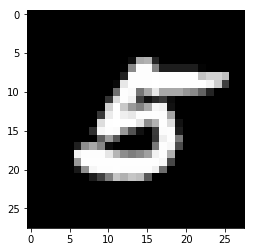

In [24]:
pred_figure(10100,cmp=False,)

In [ ]:
ac = 0
total = train_data.shape[0]
for i in range(total):
    if i % 1000 == 0:
        print('{},{:.4f}%'.format(i,ac/(i+1)*100))
    ac += pred_figure(i,cmp=False)

0,0.0000%


/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


1000,91.3087%
2000,88.4558%
3000,87.8374%
4000,87.3782%
5000,87.3425%
6000,87.3521%
7000,87.0019%
8000,86.8641%
9000,86.7348%
10000,86.7813%
11000,86.6648%
12000,86.6094%
13000,86.3549%
14000,86.1796%
15000,86.1543%
16000,86.1571%
17000,86.1479%
18000,85.9786%
19000,85.9165%
20000,85.9957%
21000,86.0626%
22000,85.9734%
23000,85.9919%
24000,85.9631%
25000,85.9726%
26000,85.9813%
27000,85.9598%
28000,85.8541%
29000,85.8660%
30000,85.8638%
31000,85.8521%
32000,85.7879%
33000,85.7944%
34000,85.7916%
35000,85.7461%
36000,85.7115%
37000,85.6950%
38000,85.6793%
39000,85.6824%
40000,85.7229%
41000,85.6808%


In [13]:
test_data = pd.read_csv('test.csv')

In [14]:
test_data.shape

(28000, 784)

In [15]:
def ith_test(i,need_data=False,need_show=True):
    data = test_data.iloc[i,:]
    if need_show:
        plt.imshow(data.iloc[0:].values.reshape(28,28),cmap='gray')
    if need_data:
        return data
    else:
        return None

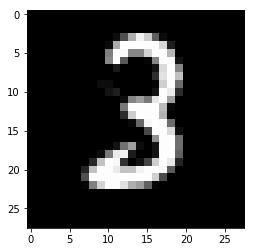

In [16]:
ith_test(4)

In [18]:
result = np.zeros((test_data.shape[0],1))
for i in range(result.shape[0]):
    x = ith_test(i,need_data=True,need_show=False)
    x = x.reshape((-1,1))/255
    _,_,_,y = forward(x,W1_best,W2_best,b1_best,b2_best)
    result[i,0] = y.argmax()

/home/luo3300612/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [19]:
result = result.astype(np.int64)

In [20]:
result

array([[2],
       [0],
       [9],
       ...,
       [3],
       [9],
       [2]])

[0]


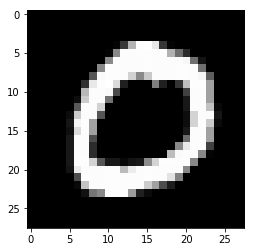

In [21]:
k = 111
ith_test(k,need_data=False,need_show=True)
print(result[k])

In [22]:
ret = pd.DataFrame(columns=['ImageId','Label'])

In [23]:
ret.ImageId = np.arange(1,test_data.shape[0]+1)

In [24]:
ret.Label = result

In [25]:
ret.to_csv('ret.csv',index=False)

In [31]:
np.save('W1.npy',W1_best)
np.save('W2.npy',W2_best)
np.save('b1.npy',b1_best)
np.save('b2.npy',b2_best)

In [27]:
ww1 = np.load('W1.npy')

In [13]:
W1 = np.load('W1.npy')
W2 = np.load('W2.npy')
b1 = np.load('b1.npy')
b2 = np.load('b2.npy')

In [29]:
ww1

array([[-0.0498548 , -0.09679099,  0.01262988, ..., -0.07923148,
         0.09207454,  0.101146  ],
       [ 0.00797919,  0.00950298, -0.08467845, ...,  0.05186182,
        -0.06102393, -0.09560489],
       [-0.06041014,  0.05424142,  0.02701087, ..., -0.03236378,
        -0.10109021, -0.03719381],
       ...,
       [ 0.06626354, -0.1117739 , -0.10101458, ..., -0.03862663,
         0.03370364, -0.10152514],
       [-0.11922491,  0.10803866,  0.10065982, ...,  0.0925209 ,
        -0.00635217, -0.0523563 ],
       [ 0.08106781, -0.01123897,  0.0299691 , ..., -0.08593178,
        -0.03172381,  0.02067275]])